In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('./Linear_dataset.csv').values

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [5]:
X = torch.tensor(data[:,:-1])
y = torch.tensor(data[:,-1])

In [6]:
def model(x, a, b):
    return torch.matmul(x, a.double()) + b.double()

In [7]:
def loss_fn(y_hat, y):
    mse = torch.mean((y_hat - y)**2)
    return mse

In [8]:
def training_loop(n_epochs, learning_rate, params, x, y):
    a, b = params
    losses = []

    for epoch in range(1, n_epochs + 1):

        y_hat = model(x, a, b)
        loss = loss_fn(y_hat, y)

        loss.backward()

        a.data -= learning_rate * a.grad.data
        b.data -= learning_rate * b.grad.data

        a.grad.data.zero_()
        b.grad.data.zero_()

        losses.append(loss.item())
        print('Epoch %d, loss %f' % (epoch, float(loss)))
    
    return a, b, losses

In [9]:
a = torch.tensor([1.0, 1.0], requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [10]:
a, b, losses = training_loop(20, 0.1, (a, b), X, y)

Epoch 1, loss 2.532406
Epoch 2, loss 1.618859
Epoch 3, loss 1.035311
Epoch 4, loss 0.662397
Epoch 5, loss 0.423987
Epoch 6, loss 0.271502
Epoch 7, loss 0.173932
Epoch 8, loss 0.111473
Epoch 9, loss 0.071474
Epoch 10, loss 0.045847
Epoch 11, loss 0.029421
Epoch 12, loss 0.018888
Epoch 13, loss 0.012131
Epoch 14, loss 0.007794
Epoch 15, loss 0.005010
Epoch 16, loss 0.003222
Epoch 17, loss 0.002073
Epoch 18, loss 0.001334
Epoch 19, loss 0.000859
Epoch 20, loss 0.000553


In [11]:
a, b

(tensor([ 0.9806, -0.2223], requires_grad=True),
 tensor(0.0115, requires_grad=True))

In [12]:
X[0], y[0]

(tensor([ 1.0337, -0.6839], dtype=torch.float64),
 tensor(1.1794, dtype=torch.float64))

In [13]:
y_hat = model(X, a, b).detach().numpy()

c:\Users\ChiThang\miniconda3\envs\usual\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


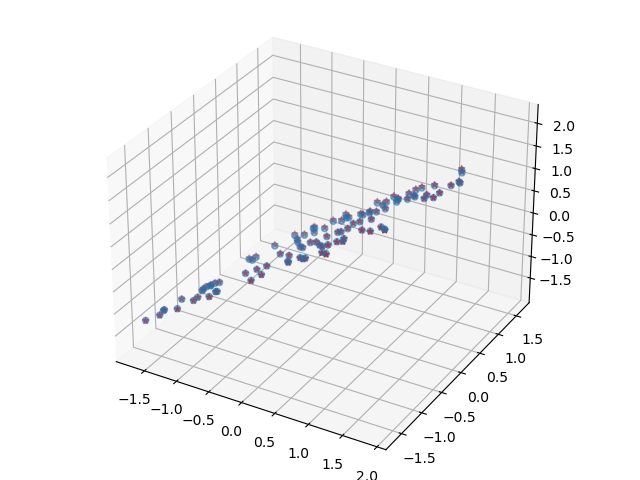

In [19]:
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], y, alpha=0.5)
ax.scatter(X[:,0], X[:,1], y_hat, marker="*", c='red')

plt.show()